<a href="https://colab.research.google.com/github/sujithcplusplus/facial_feature_mapping/blob/main/facial_feature_mapping_basic_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Facial Feature Mapping Project/Dataset.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd
coordinates = pd.read_csv('training.csv')
coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
null_counts = coordinates.isnull().sum()
null_counts

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

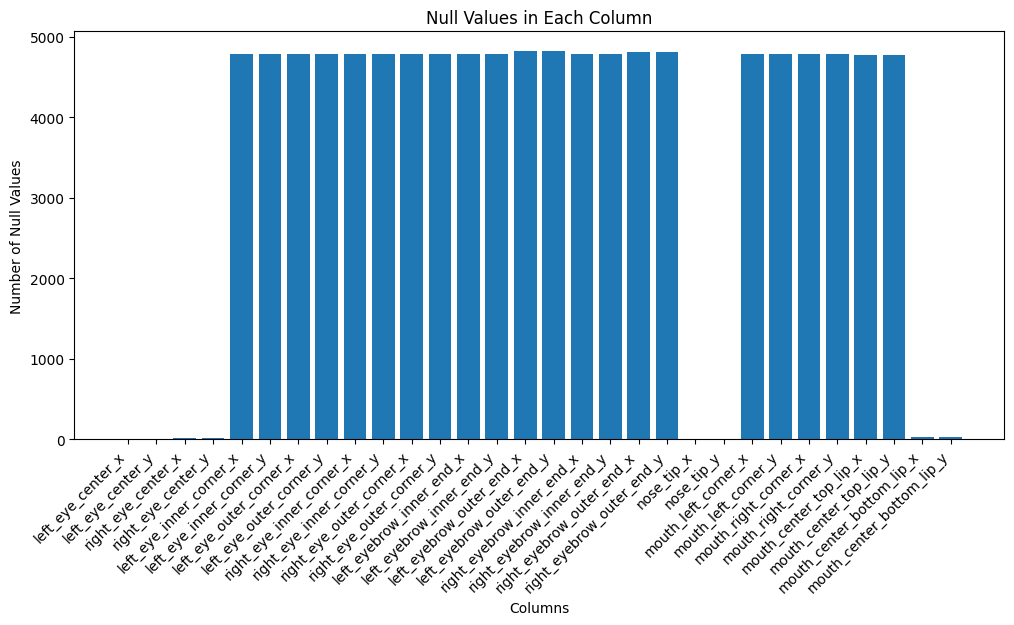

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)

plt.bar(null_counts.index, null_counts.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Each Column')

plt.show()

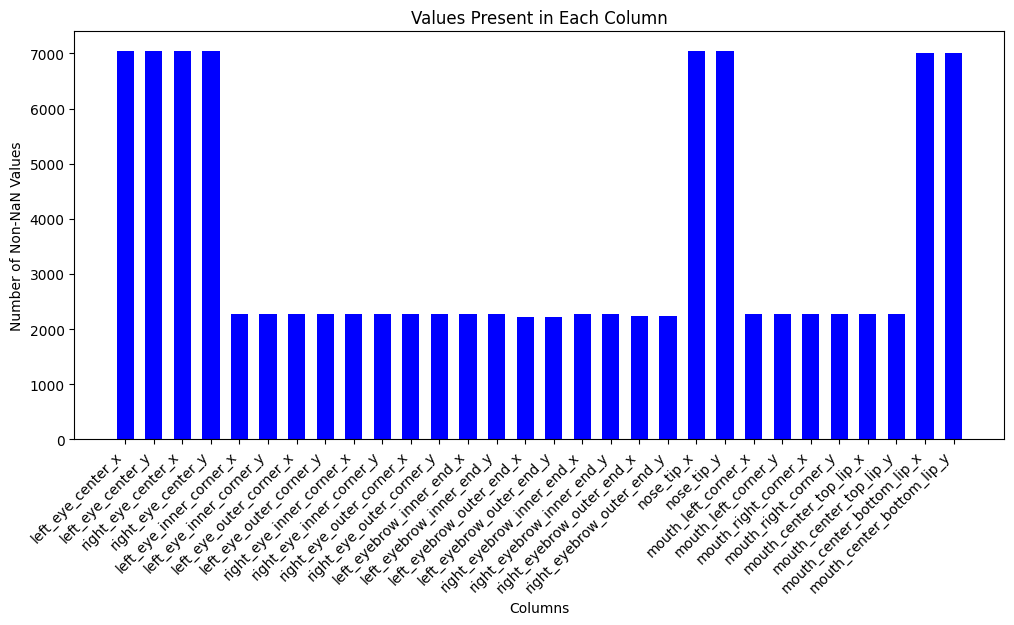

In [ ]:
non_nan_counts = coordinates.count()
plt.figure(figsize=(12, 6))
plt.bar(non_nan_counts.index, non_nan_counts.values, width=0.6, color='blue')

plt.xlabel('Columns')
plt.ylabel('Number of Non-NaN Values')
plt.title('Values Present in Each Column')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)

plt.show()


In [ ]:

ff_cor = coordinates.fillna(method='ffill')
ff_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7049 non-null   float64
 1   left_eye_center_y          7049 non-null   float64
 2   right_eye_center_x         7049 non-null   float64
 3   right_eye_center_y         7049 non-null   float64
 4   left_eye_inner_corner_x    7049 non-null   float64
 5   left_eye_inner_corner_y    7049 non-null   float64
 6   left_eye_outer_corner_x    7049 non-null   float64
 7   left_eye_outer_corner_y    7049 non-null   float64
 8   right_eye_inner_corner_x   7049 non-null   float64
 9   right_eye_inner_corner_y   7049 non-null   float64
 10  right_eye_outer_corner_x   7049 non-null   float64
 11  right_eye_outer_corner_y   7049 non-null   float64
 12  left_eyebrow_inner_end_x   7049 non-null   float64
 13  left_eyebrow_inner_end_y   7049 non-null   float

In [ ]:
import tensorflow as tf
from PIL import Image
import glob
import os
paths = sorted(glob.glob('/content/images/train_images/*'))
paths[:10]

['/content/images/train_images/0.jpg',
 '/content/images/train_images/1.jpg',
 '/content/images/train_images/10.jpg',
 '/content/images/train_images/100.jpg',
 '/content/images/train_images/1000.jpg',
 '/content/images/train_images/1001.jpg',
 '/content/images/train_images/1002.jpg',
 '/content/images/train_images/1003.jpg',
 '/content/images/train_images/1004.jpg',
 '/content/images/train_images/1005.jpg']

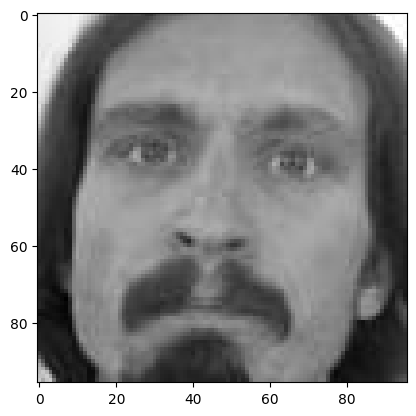

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
plt.imshow(img.imread(paths[0]));

In [ ]:
from PIL import Image
import numpy as np
image_tensors = []
for i in paths:
  itensor = tf.image.rgb_to_grayscale(tf.convert_to_tensor(Image.open(i),dtype=tf.float32))
  image_tensors.append(itensor)

image_tensors = np.array(image_tensors)

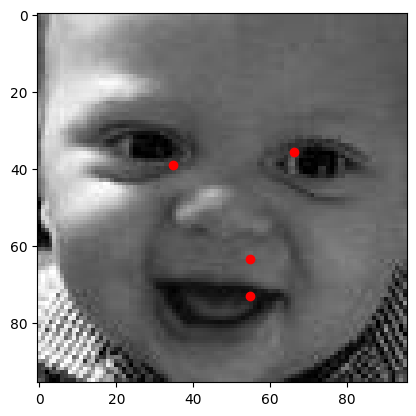

In [ ]:
import random
IMGNo = random.randint(0,len(paths)-1)
testImage = img.imread(paths[IMGNo])
plt.imshow(testImage,cmap='gray')
plt.plot([coordinates.iloc[IMGNo,::2]],[coordinates.iloc[IMGNo,1::2]],'ro');

In [ ]:
y = []
for i in range(0,len(ff_cor)):
  y_i = ff_cor.iloc[i,:]
  y.append(y_i/96)

y = np.array(y,dtype='float')

In [ ]:
X = []
for i in range(0,len(image_tensors)):
  Xi = image_tensors[i]/255.
  X.append(Xi)
X = np.array(X,dtype='float')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
import tensorflow as tf
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(96,96,1)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(30,activation='linear'),
  ])

model_1.compile(loss = 'mae',
                optimizer = 'adam',
                metrics = ['mae','mse'])

model_1_history = model_1.fit(X_train,y_train,
            epochs = 50,
            batch_size = 128,
            validation_data = (X_val,y_val))

Epoch 1/50
45/45 [==============================] - 14s 58ms/step - loss: 0.0954 - mae: 0.0954 - mse: 0.0219 - val_loss: 0.1613 - val_mae: 0.1613 - val_mse: 0.0314
Epoch 2/50
45/45 [==============================] - 2s 46ms/step - loss: 0.0293 - mae: 0.0293 - mse: 0.0017 - val_loss: 0.1171 - val_mae: 0.1171 - val_mse: 0.0168
Epoch 3/50
45/45 [==============================] - 2s 45ms/step - loss: 0.0239 - mae: 0.0239 - mse: 0.0013 - val_loss: 0.0907 - val_mae: 0.0907 - val_mse: 0.0104
Epoch 4/50
45/45 [==============================] - 2s 47ms/step - loss: 0.0231 - mae: 0.0231 - mse: 0.0012 - val_loss: 0.0834 - val_mae: 0.0834 - val_mse: 0.0088
Epoch 5/50
45/45 [==============================] - 2s 49ms/step - loss: 0.0220 - mae: 0.0220 - mse: 0.0012 - val_loss: 0.0757 - val_mae: 0.0757 - val_mse: 0.0074
Epoch 6/50
45/45 [==============================] - 2s 48ms/step - loss: 0.0217 - mae: 0.0217 - mse: 0.0012 - val_loss: 0.0606 - val_mae: 0.0606 - val_mse: 0.0049
Epoch 7/50
45/45 [===

In [ ]:
model_1_predictions = model_1.predict(X_val)

45/45 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model_1_mse = mean_squared_error(y_val*96,model_1_predictions*96)
model_1_mae = mean_absolute_error(y_val*96,model_1_predictions*96)

model_1_mse,model_1_mae

(10.109755457613886, 1.922856649052907)

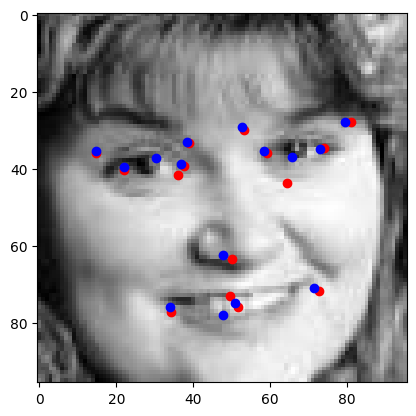

In [ ]:
y_val = pd.DataFrame(y_val)
model_1_predictions = pd.DataFrame(model_1_predictions)
IMGNo = random.randint(0,len(X_val)-1)
plt.imshow(X_val[IMGNo],cmap='gray')
plt.plot([y_val.iloc[IMGNo,::2]*96],[y_val.iloc[IMGNo,1::2]*96],'ro');
plt.plot([model_1_predictions.iloc[IMGNo,::2]*96],[model_1_predictions.iloc[IMGNo,1::2]*96],'bo');

In [ ]:
test_image_paths =sorted(glob.glob('/content/images/test_images/*'))

In [ ]:
test_images = []
for i in test_image_paths:
  tim = tf.image.rgb_to_grayscale(tf.convert_to_tensor(Image.open(i),dtype = tf.float32))/255.
  test_images.append(tim)

test_images = np.array(test_images)

In [ ]:
model_1_test_predictions = model_1.predict(test_images)

56/56 [==============================] - 0s 7ms/step


In [ ]:
model_1_test_predictions = pd.DataFrame(model_1_test_predictions)*96

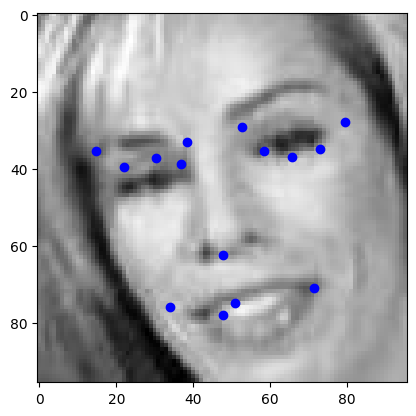

In [ ]:
IMGNo = random.randint(0,len(test_images)-1)
testImage = img.imread(test_image_paths[IMGNo])
plt.imshow(testImage,cmap='gray')
plt.plot(model_1_test_predictions.iloc[IMGNo,::2],model_1_test_predictions.iloc[IMGNo,1::2],'bo');